✅ Gradient Boosting 模型已保存为 'gradient_boosting_model.pkl'
                 Model    Class  Precision    Recall  F1-Score  Support
0            SVM (RBF)     fail   0.949580  0.875969  0.911290      129
1            SVM (RBF)  success   0.692308  0.857143  0.765957       42
2        Random Forest     fail   0.977273  1.000000  0.988506      129
3        Random Forest  success   1.000000  0.928571  0.962963       42
4    Gradient Boosting     fail   1.000000  1.000000  1.000000      129
5    Gradient Boosting  success   1.000000  1.000000  1.000000       42
6  Logistic Regression     fail   0.945946  0.813953  0.875000      129
7  Logistic Regression  success   0.600000  0.857143  0.705882       42


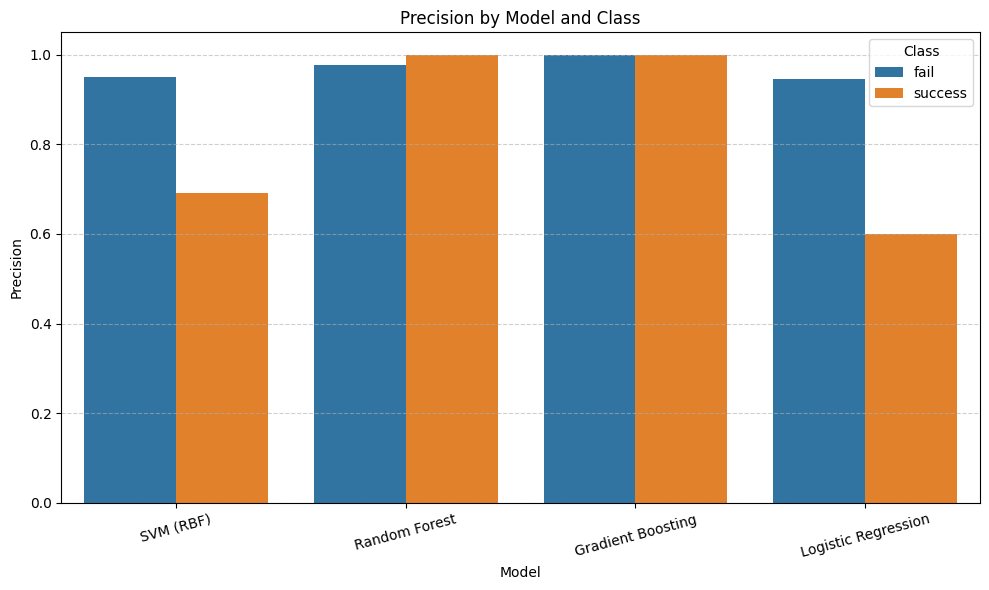

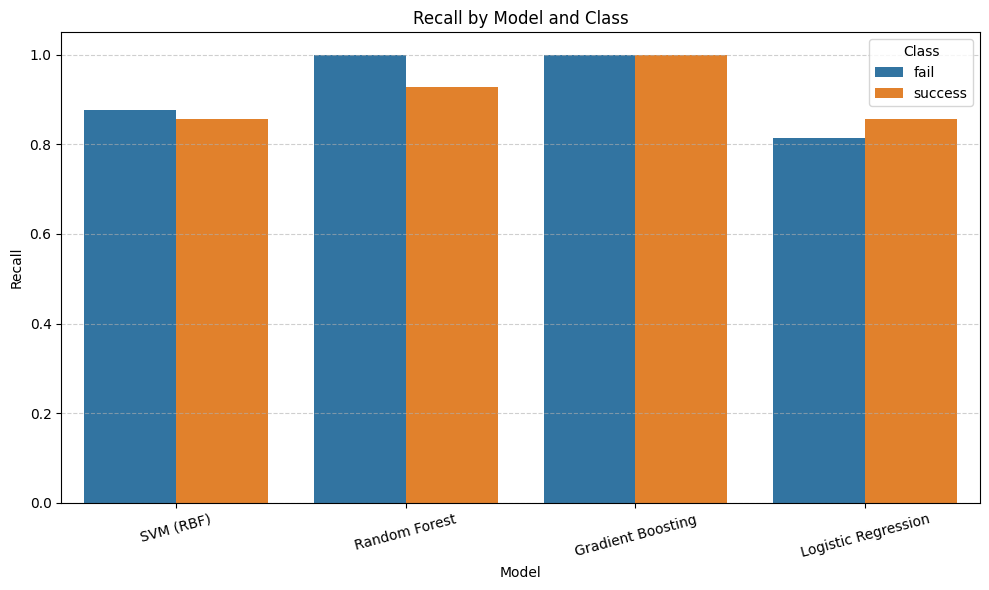

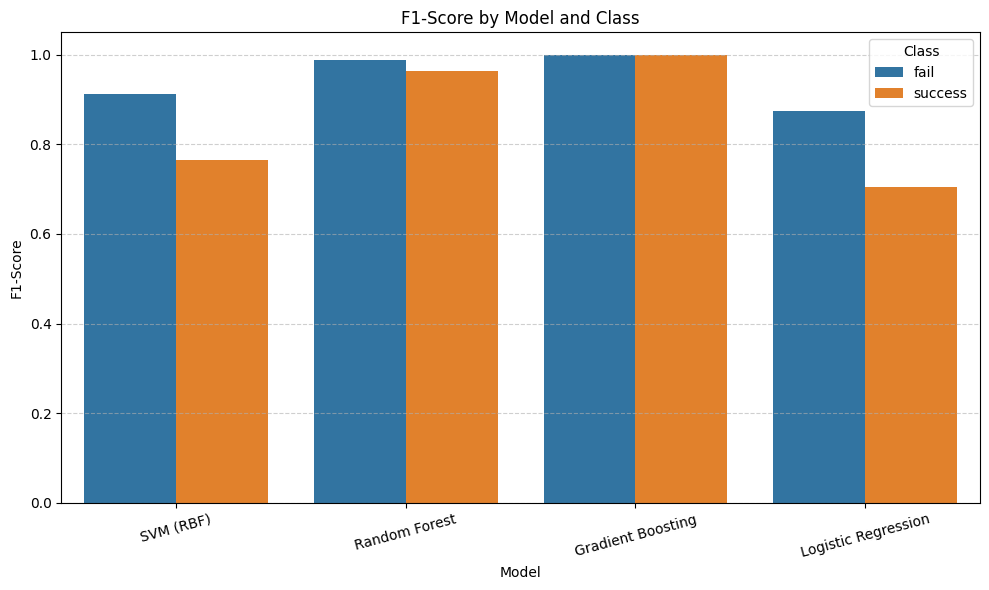

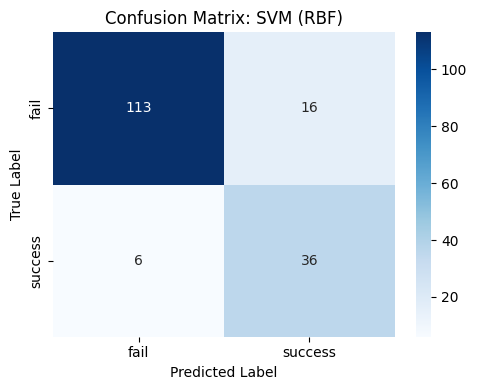

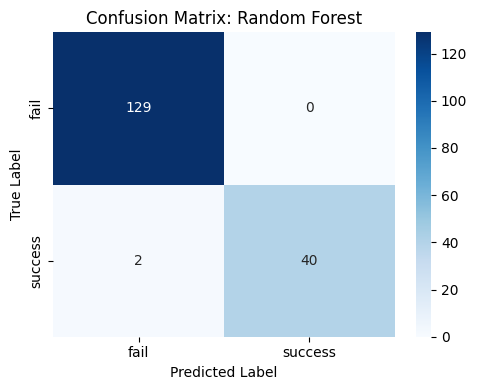

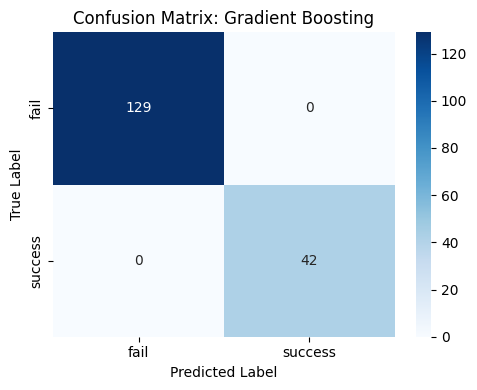

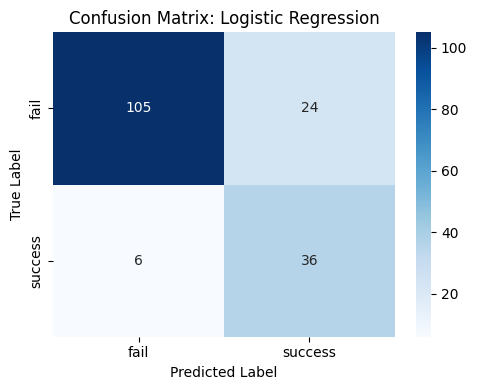

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# === 1. 读取数据 ===
train_path = "../Data_Preprocessing/Preprocessed_Dataset/train_dataset_with_ratio.csv"
test_path = "../Data_Preprocessing/Preprocessed_Dataset/test_dataset_with_ratio.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# === 2. 特征与标签 ===
# 使用你自己已经加好的 beta_alpha_ratio
X_train = train_df[['jx', 'alpha', 'beta', 'beta_alpha_ratio']].values
X_test = test_df[['jx', 'alpha', 'beta', 'beta_alpha_ratio']].values

# 标签编码
le = LabelEncoder()
y_train = le.fit_transform(train_df['result'])
y_test = le.transform(test_df['result'])

# === 3. 特征标准化 ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. 定义多个模型 ===
models = {
    'SVM (RBF)': SVC(kernel='rbf', class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000)
}

# === 5. 收集各模型的分类指标 ===
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)

    if name == "Gradient Boosting":
        import joblib
        joblib.dump(model, 'gradient_boosting_model.pkl')
        joblib.dump(scaler, 'scaler.pkl')
        joblib.dump(le, 'label_encoder.pkl')
        print("✅ Gradient Boosting 模型已保存为 'gradient_boosting_model.pkl'")
        
    for cls in le.classes_:
        results.append({
            "Model": name,
            "Class": cls,
            "Precision": report[cls]["precision"],
            "Recall": report[cls]["recall"],
            "F1-Score": report[cls]["f1-score"],
            "Support": int(report[cls]["support"])
        })

# === 训练 Gradient Boosting 模型 ===


# === 6. 分类报告转 DataFrame ===
df = pd.DataFrame(results)
print(df)

# === 7. 指标可视化比较 ===
metrics = ['Precision', 'Recall', 'F1-Score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Model', y=metric, hue='Class')
    plt.title(f'{metric} by Model and Class')
    plt.ylim(0, 1.05)
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# === 8. 可视化每个模型的混淆矩阵 ===
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    labels = le.classes_

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
